In [25]:
# General stuff
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size':22})

In [26]:
# Convergence of the screening
file_name='./Convergence_curves/Effective_unit_cell.dat'
file=open(file_name,"r")
lines=file.readlines()

read_line=False
eff_at=[]
res=[]
for line in lines:
    if 'Effective unit cell analysis:' in line:
        read_line=True
        continue
    if read_line:
        if line.strip():
            eff_at.append(int(line.split()[0]))
            for ii in range(2,6):
                res.append(float(line.split()[ii]))
        else:
            break
            
file.close()

res=np.reshape(np.array(res),(7,4))


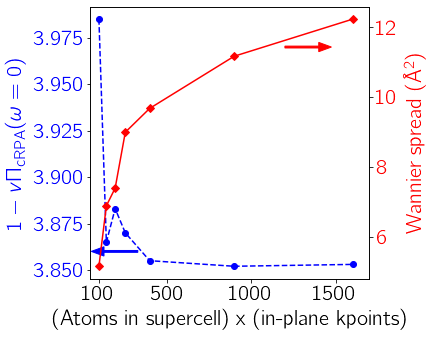

In [27]:
fig1,ax11 = plt.subplots(figsize=(5,5))


ax11.plot(eff_at,res[:,3],'bo--')

ax12=ax11.twinx()
ax12.plot(eff_at,res[:,0],'rD-')

ax11.set_xlabel('(Atoms in supercell) x (in-plane kpoints)')
ax11.set_xticks([100,500,1000,1500])
ax11.set_xlim(50,1700)
ax11.set_ylabel(r'$1-v\Pi_{\rm cRPA}(\omega=0)$', color='Blue')
ax11.tick_params(axis='y', labelcolor='Blue')
ax12.tick_params(axis='y', labelcolor='Red')
ax12.set_ylabel('Wannier spread (\AA$^2$)', color='Red')

# Arrow
ax11.arrow(330, 3.860, -200, 0.0, head_width=0.005, head_length=75, fc='b', ec='b')
ax11.arrow(1200, 3.970, 200, 0.0, head_width=0.005, head_length=75, fc='r', ec='r')

plt.savefig('CBCN_screen.pdf',bbox_inches='tight')
plt.show()

In [28]:
# Convergence of the screening: Atoms
file_name='./Convergence_curves/Lattice_convergence_bulk.dat'
file=open(file_name,"r")
lines=file.readlines()

read_line=False
n_at=[]
res_at=[]
for line in lines:
    if '#atoms' in line:
        read_line=True
        continue
    if read_line:
        if line.strip():
            n_at.append(int(line.split()[0]))
            for ii in range(1,4):
                res_at.append(float(line.split()[ii]))
        else:
            break
            
file.close()

res_at=np.reshape(np.array(res_at),(4,3))

# Convergence of the screening: Bands
file_name='./Convergence_curves/Bands_convergence_bulk.dat'
file=open(file_name,"r")
lines=file.readlines()

read_line=False
n_bnd=[]
res_bnd=[]
for line in lines:
    if '#Bands/atom' in line:
        read_line=True
        continue
    if read_line:
        if line.strip():
            n_bnd.append(float(line.split()[0]))
            for ii in range(1,4):
                res_bnd.append(float(line.split()[ii]))
        else:
            break
            
file.close()

res_bnd=np.reshape(np.array(res_bnd),(4,3))

# Convergence of the screening: Kpoints
file_name='./Convergence_curves/Kmesh_convergence_bulk.dat'
file=open(file_name,"r")
lines=file.readlines()

read_line=False
n_kpt=[]
res_kpt=[]
for line in lines:
    if '#kpoints' in line:
        read_line=True
        continue
    if read_line:
        if line.strip():
            n_kpt.append(float(line.split()[0]))
            for ii in range(1,4):
                res_kpt.append(float(line.split()[ii]))
        else:
            break
            
file.close()

res_kpt=np.reshape(np.array(res_kpt),(4,3))


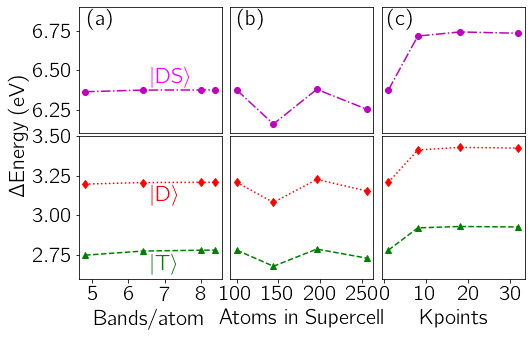

In [29]:
fig2,((ax21,ax22,ax23),(ax212,ax222,ax232)) = plt.subplots(2,3,figsize=(8,5),gridspec_kw={'height_ratios': [1,1.125]})

fmts=['g--^','r:d','m-.o']

for ii in range(0,2):
    ax212.plot(n_bnd,res_bnd[:,ii],fmts[ii])
    ax222.plot(n_at,res_at[:,ii],fmts[ii])
    ax232.plot(n_kpt,res_kpt[:,ii],fmts[ii])
    
ax21.plot(n_bnd,res_bnd[:,2],fmts[2])
ax22.plot(n_at,res_at[:,2],fmts[2])
ax23.plot(n_kpt,res_kpt[:,2],fmts[2])
    
ax212.set_xlabel('Bands/atom')
ax212.set_ylabel('$\Delta$Energy (eV)')
ax212.yaxis.set_label_coords(-0.35, 1)
ax212.set_ylim(2.6,3.5)
ax212.set_xticks([5,6,7,8])
ax21.set_xticks([])
ax21.set_ylim(6.1,6.9)
ax212.set_yticks([2.75,3,3.25,3.5])

ax222.set_xlabel('Atoms in Supercell')
ax222.set_yticks([])
ax222.set_xticks([100,150,200,250])
ax222.set_ylim(2.6,3.5)
ax22.set_xticks([])
ax22.set_ylim(6.1,6.9)
ax22.set_yticks([])

ax232.set_xlabel('Kpoints')
ax232.set_yticks([])
ax232.set_xticks([0,10,20,30])
ax232.set_ylim(2.6,3.5)
ax23.set_xticks([])
ax23.set_ylim(6.1,6.9)
ax23.set_yticks([])

fig2.text(0.25,0.15,r'$\vert {\rm T} \rangle$',color='green')
fig2.text(0.25,0.34,r'$\vert {\rm D} \rangle$',color='red')
fig2.text(0.25,0.67,r'$\vert {\rm DS} \rangle$',color='magenta')

fig2.text(0.14,0.83,'(a)')
fig2.text(0.40,0.83,'(b)')
fig2.text(0.66,0.83,'(c)')

fig2.subplots_adjust(wspace=0.06,hspace=0.02)

plt.savefig('CBCN_conv.pdf',bbox_inches='tight')
plt.show()

In [30]:
# Dimer model
U=0.53
t=-1.32
E_GS=U/2.0-0.5*math.sqrt(U**2+16*t**2)
E_T=-U
E_D=0
E_DS=U/2.0+0.5*math.sqrt(U**2+16*t**2)

del_v=3.45401286
t_tilde=t*math.sqrt(1+(del_v/t)**2)
E_GS_tilde=U/2.0-0.5*math.sqrt(U**2+16*t_tilde**2)

print(E_GS_tilde)
print(E_T-E_GS)
print(E_D-E_GS)
print(E_DS-E_GS)

print(U/math.sqrt(U**2+16*t**2))

-7.135043536911221
1.8582668542760639
2.388266854276064
5.306533708552128
0.09987687426649909


In [31]:
# Load the energies for different interactions
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/U_test/'
uijkl=np.loadtxt(path+'0_int_opt_energy_deg.dat',usecols=range(0,1))
u_uprime_j=np.loadtxt(path+'1_int_opt_energy_deg.dat',usecols=range(0,1))
uij_jij=np.loadtxt(path+'2_int_opt_energy_deg.dat',usecols=range(0,1))
u_only=np.loadtxt(path+'3_int_opt_energy_deg.dat',usecols=range(0,1))
u_u_prime=np.loadtxt(path+'4_int_opt_energy_deg.dat',usecols=range(0,1))
u_j=np.loadtxt(path+'5_int_opt_energy_deg.dat',usecols=range(0,1))

Us=[uijkl,uij_jij,u_uprime_j,u_j,u_u_prime,u_only]

path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/U_test/diag_test/'
uijkl=np.loadtxt(path+'0_int_opt_energy_deg.dat',usecols=range(0,1))
u_uprime_j=np.loadtxt(path+'1_int_opt_energy_deg.dat',usecols=range(0,1))
uij_jij=np.loadtxt(path+'2_int_opt_energy_deg.dat',usecols=range(0,1))
u_only=np.loadtxt(path+'3_int_opt_energy_deg.dat',usecols=range(0,1))
u_u_prime=np.loadtxt(path+'4_int_opt_energy_deg.dat',usecols=range(0,1))
u_j=np.loadtxt(path+'5_int_opt_energy_deg.dat',usecols=range(0,1))

Us_diag=[uijkl,uij_jij,u_uprime_j,u_j,u_u_prime,u_only]

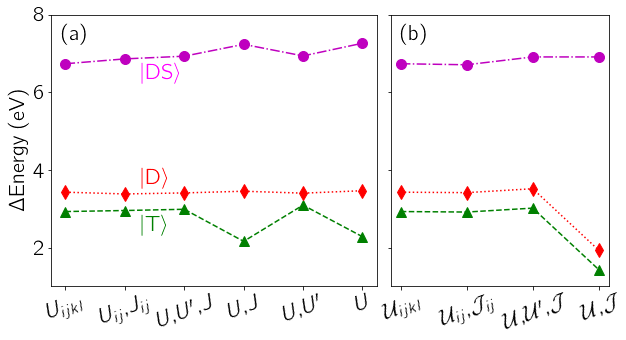

In [32]:
fig3,(ax31,ax32)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [1.5, 1]})

fmts=['g--^','r:d','m-.o']

for ii in range(1,4):
    state=np.zeros(6)
    state_diag=np.zeros(4)
    for jj in range(0,6):
        state[jj]=Us[jj][ii]
        if jj < 4:
            state_diag[jj]=Us_diag[jj][ii]
        
    ax31.plot(state,fmts[ii-1],markersize=10)
    ax32.plot(state_diag,fmts[ii-1],markersize=10)

# Hubbard dimer
#ax31.plot([5,5,5],[1.86,2.39,5.31],'bx')
    
# Plot Params
ax31.set_xticks([0,1,2,3,4,5])
ax31.set_xticklabels(['$U_{ijkl}$','$U_{ij}$,$J_{ij}$','$U$,$U^\prime$,$J$','$U$,$J$','$U$,$U^\prime$','$U$'],rotation=20)
ax31.set_ylabel('$\Delta$Energy (eV)')
ax31.set_ylim(1,8)
#ax31.set_title('(a)',loc='left',x=-0.15)

ax32.set_xticks([0,1,2,3])
ax32.set_xticklabels(['$\mathcal{U}_{ijkl}$','$\mathcal{U}_{ij}$,$\mathcal{J}_{ij}$','$\mathcal{U}$,$\mathcal{U}^\prime$,$\mathcal{J}$','$\mathcal{U}$,$\mathcal{J}$'],rotation=20)
ax32.set_ylim(1,8)
ax32.set_yticklabels([])
#ax32.set_title('(b)',loc='left',x=-0.05)

fig3.text(0.25,0.28,r'$\vert {\rm T} \rangle$',color='green')
fig3.text(0.25,0.41,r'$\vert {\rm D} \rangle$',color='red')
fig3.text(0.25,0.7,r'$\vert {\rm DS} \rangle$',color='magenta')
fig3.text(0.14,0.81,'(a)')
fig3.text(0.61,0.81,'(b)')

fig3.subplots_adjust(wspace=0.05)

plt.savefig('CBCN_U.pdf',bbox_inches='tight')
plt.show()

In [33]:
# GGA, no DC
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/'
uijkl_nodc=np.loadtxt(path+'energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/excited/'
uijkl_nodc_ex=np.loadtxt(path+'energy_deg.dat',usecols=range(0,1))

# Load the energies for different DCs
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
uijkl_dc=np.loadtxt(path+'0_dc_opt_energy_deg.dat',usecols=range(0,1))
u_uprime_j_dc=np.loadtxt(path+'1_dc_opt_energy_deg.dat',usecols=range(0,1))
uij_jij_dc=np.loadtxt(path+'2_dc_opt_energy_deg.dat',usecols=range(0,1))
u_only_dc=np.loadtxt(path+'3_dc_opt_energy_deg.dat',usecols=range(0,1))
u_u_prime_dc=np.loadtxt(path+'4_dc_opt_energy_deg.dat',usecols=range(0,1))
u_j_dc=np.loadtxt(path+'5_dc_opt_energy_deg.dat',usecols=range(0,1))
avgP_dc=np.loadtxt(path+'avgp_dc_opt_energy_deg.dat',usecols=range(0,1))

DCs=[uijkl_nodc,uijkl_dc,avgP_dc,uij_jij_dc,u_uprime_j_dc,u_j_dc,u_u_prime_dc,u_only_dc]

#Excited

path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/excited/DC_test/'
uijkl_dc_ex=np.loadtxt(path+'0_dc_opt_energy_deg.dat',usecols=range(0,1))
u_uprime_j_dc_ex=np.loadtxt(path+'1_dc_opt_energy_deg.dat',usecols=range(0,1))
uij_jij_dc_ex=np.loadtxt(path+'2_dc_opt_energy_deg.dat',usecols=range(0,1))
u_only_dc_ex=np.loadtxt(path+'3_dc_opt_energy_deg.dat',usecols=range(0,1))
u_u_prime_dc_ex=np.loadtxt(path+'4_dc_opt_energy_deg.dat',usecols=range(0,1))
u_j_dc_ex=np.loadtxt(path+'5_dc_opt_energy_deg.dat',usecols=range(0,1))
avgP_dc_ex=np.loadtxt(path+'pavg_dc_opt_energy_deg.dat',usecols=range(0,1))

DCs_ex=[uijkl_nodc_ex,uijkl_dc_ex,avgP_dc_ex,uij_jij_dc_ex,u_uprime_j_dc_ex,u_j_dc_ex,u_u_prime_dc_ex,u_only_dc_ex]


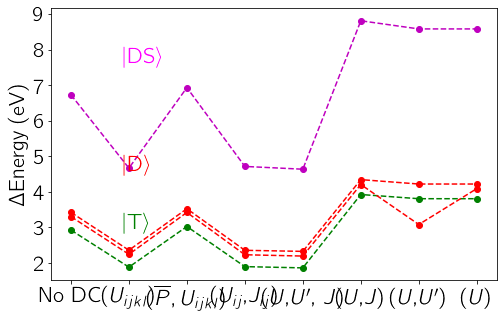

In [34]:
fig4,ax41=plt.subplots(figsize=(8,5))

fmts=['g--o','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(8)
    sing_zpl=np.zeros(8)
    for jj in range(0,8):
        state[jj]=DCs[jj][ii]
        sing_zpl[jj]=DCs[jj][ii]-(DCs[jj][ii]-DCs_ex[jj][ii])/2
        
    ax41.plot(state,fmts[ii-1])
    
    if ii==2:
        ax41.plot(sing_zpl,fmts[ii-1])
        
    
# Plot Params
ax41.set_xticks([0,1,2,3,4,5,6,7])
ax41.set_xticklabels(['No DC','($U_{ijkl}$)','($\overline{P},U_{ijkl}$)','($U_{ij}$,$J_{ij})$','($U$,$U^\prime$, $J$)','($U$,$J$)','($U$,$U^\prime$)','($U$)'])
ax41.set_ylabel('$\Delta$Energy (eV)')
ax41.set_yticks([2,3,4,5,6,7,8,9])

fig4.text(0.25,0.27,r'$\vert {\rm T} \rangle$',color='green')
fig4.text(0.25,0.43,r'$\vert {\rm D} \rangle$',color='red')
fig4.text(0.25,0.73,r'$\vert {\rm DS} \rangle$',color='magenta')

#plt.savefig('CBCN_DC.pdf',bbox_inches='tight')
plt.show()

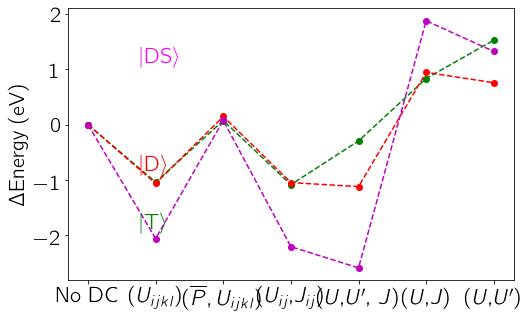

In [35]:
# Looking at the change in energy with DC correction
fig5,ax51=plt.subplots(figsize=(8,5))

fmts=['g--o','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(7)
    for jj in range(1,7):
        state[jj]=DCs[jj][ii]-Us[jj-1][ii]
    ax51.plot(state,fmts[ii-1])

# Plot Params
ax51.set_xticks([0,1,2,3,4,5,6])
ax51.set_xticklabels(['No DC','($U_{ijkl}$)','($\overline{P},U_{ijkl}$)','($U_{ij}$,$J_{ij})$','($U$,$U^\prime$, $J$)','($U$,$J$)','($U$,$U^\prime$)','($U$)'])
ax51.set_ylabel('$\Delta$Energy (eV)')
#ax51.set_yticks([2,3,4,5,6,7,8,9])

fig5.text(0.25,0.27,r'$\vert {\rm T} \rangle$',color='green')
fig5.text(0.25,0.43,r'$\vert {\rm D} \rangle$',color='red')
fig5.text(0.25,0.73,r'$\vert {\rm DS} \rangle$',color='magenta')

#plt.savefig('CBCN_DC.pdf',bbox_inches='tight')
plt.show()

In [36]:
# HSE, no DC
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/ground/'
uijkl_nodc_hse=np.loadtxt(path+'energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/excited/'
uijkl_nodc_ex_hse=np.loadtxt(path+'energy_deg.dat',usecols=range(0,1))

# Load the energies for different DCs for HSE
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/ground/DC_test/'
hse_uijkl_dc=np.loadtxt(path+'0_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_uprime_j_dc=np.loadtxt(path+'1_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_uij_jij_dc=np.loadtxt(path+'2_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_only_dc=np.loadtxt(path+'3_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_u_prime_dc=np.loadtxt(path+'4_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_j_dc=np.loadtxt(path+'5_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_avgP_dc=np.loadtxt(path+'pavg_dc_opt_energy_deg.dat',usecols=range(0,1))

hse_DCs=[uijkl_nodc_hse,hse_uijkl_dc,hse_avgP_dc,hse_uij_jij_dc,hse_u_uprime_j_dc,hse_u_j_dc,hse_u_u_prime_dc,hse_u_only_dc]

#Excited

path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/excited/DC_test/'
hse_uijkl_dc_ex=np.loadtxt(path+'0_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_uprime_j_dc_ex=np.loadtxt(path+'1_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_uij_jij_dc_ex=np.loadtxt(path+'2_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_only_dc_ex=np.loadtxt(path+'3_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_u_prime_dc_ex=np.loadtxt(path+'4_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_u_j_dc_ex=np.loadtxt(path+'5_dc_opt_energy_deg.dat',usecols=range(0,1))
hse_avgP_dc_ex=np.loadtxt(path+'pavg_dc_opt_energy_deg.dat',usecols=range(0,1))

hse_DCs_ex=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_avgP_dc_ex,hse_uij_jij_dc_ex,hse_u_uprime_j_dc_ex,hse_u_j_dc_ex,\
            hse_u_u_prime_dc_ex,hse_u_only_dc_ex]


In [37]:
## Load the energies for different DCs: Mixing parameters of exchange
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/ground/DC_test/scale_V/'
hse_0_0=np.loadtxt(path+'0_0_dc_energy_deg.dat',usecols=range(0,1))
hse_0_2=np.loadtxt(path+'0_2_dc_energy_deg.dat',usecols=range(0,1))
hse_0_3=np.loadtxt(path+'0_3_dc_energy_deg.dat',usecols=range(0,1))
hse_0_4=np.loadtxt(path+'0_4_dc_energy_deg.dat',usecols=range(0,1))
hse_0_5=np.loadtxt(path+'0_5_dc_energy_deg.dat',usecols=range(0,1))
hse_0_6=np.loadtxt(path+'0_6_dc_energy_deg.dat',usecols=range(0,1))
hse_1_0=np.loadtxt(path+'1_0_dc_energy_deg.dat',usecols=range(0,1))
hse_alphas=np.reshape(np.concatenate((hse_0_0,hse_0_2,hse_0_3,hse_0_4,hse_0_5,hse_0_6,hse_1_0)),(7,4))

path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/excited/DC_test/scale_V/'
hse_0_0_ex=np.loadtxt(path+'0_0_dc_energy_deg.dat',usecols=range(0,1))
hse_0_2_ex=np.loadtxt(path+'0_2_dc_energy_deg.dat',usecols=range(0,1))
hse_0_3_ex=np.loadtxt(path+'0_3_dc_energy_deg.dat',usecols=range(0,1))
hse_0_4_ex=np.loadtxt(path+'0_4_dc_energy_deg.dat',usecols=range(0,1))
hse_0_5_ex=np.loadtxt(path+'0_5_dc_energy_deg.dat',usecols=range(0,1))
hse_0_6_ex=np.loadtxt(path+'0_6_dc_energy_deg.dat',usecols=range(0,1))
hse_1_0_ex=np.loadtxt(path+'1_0_dc_energy_deg.dat',usecols=range(0,1))
hse_alphas_ex=np.reshape(np.concatenate((hse_0_0_ex,hse_0_2_ex,hse_0_3_ex,\
                                         hse_0_4_ex,hse_0_5_ex,hse_0_6_ex,hse_1_0_ex)),(7,4))

alpha=[0,0.2,0.3,0.4,0.5,0.6,1.0]
#hse_alphas=[hse_0_0,hse_0_2,hse_0_3,hse_0_4,hse_0_5,hse_0_6,hse_1_0]


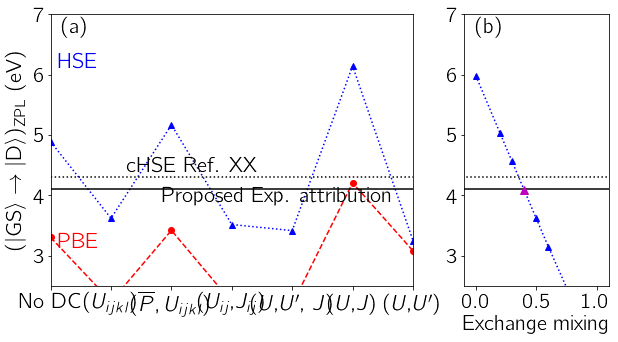

In [38]:
fig5,(ax51,ax52)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [2.5, 1]})

#fmts=['g--o','r--o','m--o']
fmts=['b:^','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(8)
    sing_zpl=np.zeros(8)
    sing_zpl_GGA=np.zeros(8)
    for jj in range(0,8):
        state[jj]=hse_DCs[jj][ii]
        sing_zpl[jj]=hse_DCs[jj][ii]-(hse_DCs[jj][ii]-hse_DCs_ex[jj][ii])/2
        sing_zpl_GGA[jj]=DCs[jj][ii]-(DCs[jj][ii]-DCs_ex[jj][ii])/2
        
    #ax51.plot(state,fmts[ii-1])
    
    
    if ii==2:
        ax51.plot(sing_zpl,fmts[0])
        ax51.plot(sing_zpl_GGA,fmts[1])
        
# "Experimental" curves
ax51.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax51.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')
    

# Dep on alpha
for jj in range(2,3):
#    ax61.plot(alpha[:],hse_alphas[:,jj],'o--')
    ax52.plot(alpha[:],hse_alphas[:,jj]-(hse_alphas[:,jj]-hse_alphas_ex[:,jj])/2,'^b:')
ax52.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax52.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')

# Highlight the HSE alpha
ax52.plot(alpha[3],hse_alphas[3,2]-(hse_alphas[3,2]-hse_alphas_ex[3,jj])/2,'^m',markersize=8)

    
# Plot Params
ax51.set_xticks([0,1,2,3,4,5,6])
ax51.set_xlim(0,6)
ax51.set_xticklabels(['No DC','($U_{ijkl}$)','($\overline{P},U_{ijkl}$)','($U_{ij}$,$J_{ij})$','($U$,$U^\prime$, $J$)','($U$,$J$)','($U$,$U^\prime$)','($U$)'])
ax51.set_ylabel(r'($\vert {\rm GS} \rangle \rightarrow \vert {\rm D} \rangle)_{\rm ZPL}$ (eV)')
ax51.set_ylim(2.5,7)

ax52.set_xlim(-0.1,1.1)
ax52.set_xticks([0,0.5,1])
ax52.set_ylim(2.5,7)
ax52.set_xlabel('Exchange mixing')

fig5.text(0.135,0.23,'PBE',color='red')
fig5.text(0.135,0.73,'HSE',color='blue')
fig5.text(0.28,0.36,'Proposed Exp. attribution',color='black')
fig5.text(0.23,0.44,'cHSE Ref. XX',color='black')

fig5.text(0.14,0.83,'(a)')
fig5.text(0.715,0.83,'(b)')


plt.savefig('CBCN_DC_ZPL.pdf',bbox_inches='tight')
plt.show()

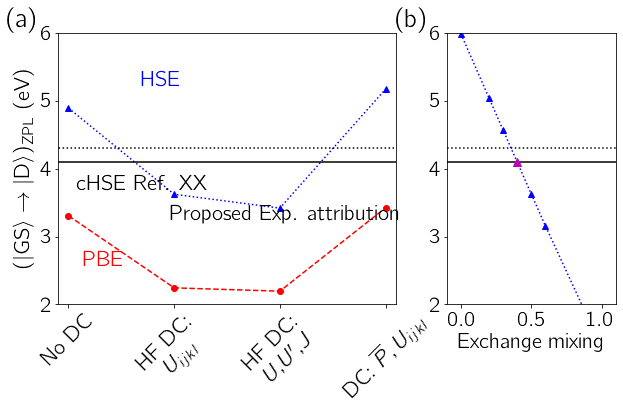

In [39]:
# JUST TWO VERSIONS

hse_DCs_2=[uijkl_nodc_hse,hse_uijkl_dc,hse_u_uprime_j_dc,hse_avgP_dc]
hse_DCs_ex_2=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_u_uprime_j_dc_ex,hse_avgP_dc_ex]
DCs_2=[uijkl_nodc,uijkl_dc,u_uprime_j_dc,avgP_dc]
DCs_ex_2=[uijkl_nodc_ex,uijkl_dc_ex,u_uprime_j_dc_ex,avgP_dc_ex]



fig5,(ax51,ax52)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [2, 1]})

#fmts=['g--o','r--o','m--o']
fmts=['b:^','r--o','m--o']



for ii in range(1,4):
    state=np.zeros(4)
    sing_zpl=np.zeros(4)
    sing_zpl_GGA=np.zeros(4)
    for jj in range(0,4):
        state[jj]=hse_DCs_2[jj][ii]
        sing_zpl[jj]=hse_DCs_2[jj][ii]-(hse_DCs_2[jj][ii]-hse_DCs_ex_2[jj][ii])/2
        sing_zpl_GGA[jj]=DCs_2[jj][ii]-(DCs_2[jj][ii]-DCs_ex_2[jj][ii])/2
        
    #ax51.plot(state,fmts[ii-1])
    
    
    if ii==2:
        ax51.plot(sing_zpl,fmts[0])
        ax51.plot(sing_zpl_GGA,fmts[1])
        
# "Experimental" curves
ax51.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax51.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')
    

# Dep on alpha
for jj in range(2,3):
#    ax61.plot(alpha[:],hse_alphas[:,jj],'o--')
    ax52.plot(alpha[:],hse_alphas[:,jj]-(hse_alphas[:,jj]-hse_alphas_ex[:,jj])/2,'^b:')
ax52.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax52.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')

# Highlight the HSE alpha
ax52.plot(alpha[3],hse_alphas[3,2]-(hse_alphas[3,2]-hse_alphas_ex[3,jj])/2,'^m',markersize=8)

    
# Plot Params
ax51.set_xticks([0,1,2,3])
ax51.set_xlim(-0.1,3.1)
ax51.set_xticklabels(['No DC','HF DC:\n $U_{ijkl}$','HF DC:\n $U$,$U^\prime$,$J$','DC: $\overline{P},U_{ijkl}$'],rotation=45)
ax51.set_ylabel(r'($\vert {\rm GS} \rangle \rightarrow \vert {\rm D} \rangle)_{\rm ZPL}$ (eV)')
ax51.set_ylim(2,6)

ax52.set_xlim(-0.1,1.1)
ax52.set_xticks([0,0.5,1])
ax52.set_ylim(2,6)
ax52.set_xlabel('Exchange mixing')

fig5.text(0.16,0.23,'PBE',color='red')
fig5.text(0.24,0.73,'HSE',color='blue')
fig5.text(0.28,0.36,'Proposed Exp. attribution',color='black')
fig5.text(0.15,0.44,'cHSE Ref. XX',color='black')

#fig5.text(0.14,0.83,'(a)')
#fig5.text(0.715,0.83,'(b)')
ax51.set_title('(a)',loc='left',x=-0.15)
ax52.set_title('(b)',loc='left',x=-0.3)

plt.savefig('CBCN_DC_ZPL_ver2.pdf',bbox_inches='tight')
plt.show()

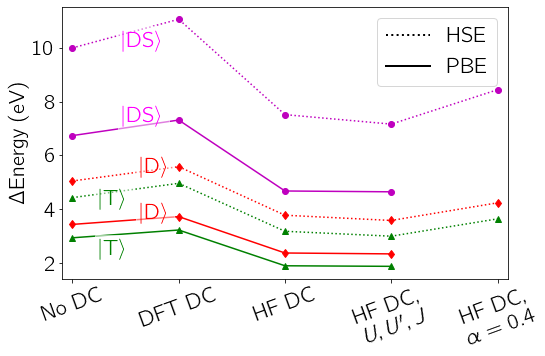

In [40]:
##### All states, DC

hse_DCs_2=[uijkl_nodc_hse,hse_uijkl_dc,hse_u_uprime_j_dc,hse_avgP_dc]
hse_DCs_ex_2=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_u_uprime_j_dc_ex,hse_avgP_dc_ex]
DCs_2=[uijkl_nodc,uijkl_dc,u_uprime_j_dc,avgP_dc]
DCs_ex_2=[uijkl_nodc_ex,uijkl_dc_ex,u_uprime_j_dc_ex,avgP_dc_ex]

# Grab the DFT DC results
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/ground/DC_test/'
hse_dft_dc=np.loadtxt(path+'dftDC_energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_dft_dc=np.loadtxt(path+'dftDC_energy_deg.dat',usecols=range(0,1))

# Lets check out GGA alpha=0
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_alpha=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))




fig6,ax61=plt.subplots(figsize=(8,5))

fmts=['g^','rd','mo']

for ii in range(1,4):
    state_hse=np.zeros(5)
    state_gga=np.zeros(4)
    # No DC
    state_hse[0]=hse_DCs_2[0][ii]
    state_gga[0]=DCs_2[0][ii]
    # DFT correction for GGA and HSE
    state_gga[1]=gga_dft_dc[ii]
    state_hse[1]=hse_dft_dc[ii]
    # HF for HSE and GGA
    state_hse[2]=hse_DCs_2[1][ii]
    state_gga[2]=DCs_2[1][ii]
    # U, U', J
    state_hse[3]=hse_DCs_2[2][ii]
    state_gga[3]=DCs_2[2][ii]
    # HF scaled for HSE
    state_hse[4]=hse_alphas[3][ii]
    #state_gga[3]=gga_alpha[ii]

    ax61.plot(state_gga,fmts[ii-1]+'-')
    ax61.plot(state_hse,fmts[ii-1]+':')
     
    
# Plot Params
ax61.set_xlim(-0.1,4.1)
ax61.set_xticks([0,1,2,3,4])
#ax61.set_ylim(2,5.5)
ax61.set_xticklabels(['No DC','DFT DC','HF DC','HF DC,\n'+'$U,U^\prime,J$','HF DC,\n'+r'$\alpha=0.4$'],rotation=20)
ax61.set_ylabel(r'$\Delta$Energy (eV)')

# Legend
leg_el = [Line2D([0], [0], color='k',ls=':',lw=2), \
          Line2D([0], [0], color='k',ls='-',lw=2)]
ax61.legend(leg_el,['HSE','PBE'],loc='upper right')#,bbox_to_anchor=(0.0,0.5))

# Text:
fig6.text(0.19,0.33,r'$\vert {\rm T} \rangle$',color='green',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.19,0.19,r'$\vert {\rm T} \rangle$',color='green',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig6.text(0.26,0.42,r'$\vert {\rm D} \rangle$',color='red',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.26,0.29,r'$\vert {\rm D} \rangle$',color='red',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig6.text(0.23,0.77,r'$\vert {\rm DS} \rangle$',color='magenta',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.23,0.56,r'$\vert {\rm DS} \rangle$',color='magenta',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))


plt.savefig('CBCN_DC_HSE_PBE_2.pdf',bbox_inches='tight')
plt.show()

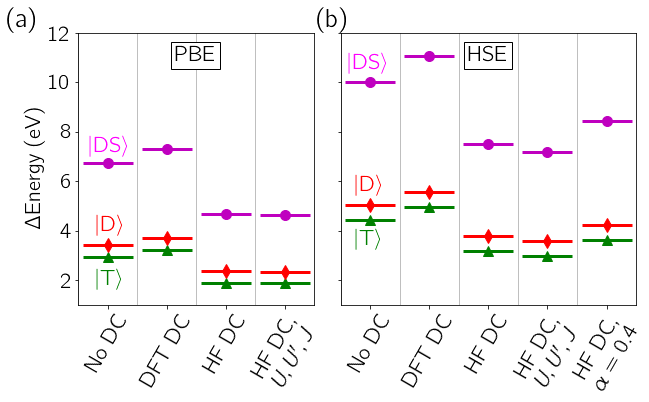

In [52]:
##### All states, DC

hse_DCs_2=[uijkl_nodc_hse,hse_uijkl_dc,hse_u_uprime_j_dc,hse_avgP_dc]
hse_DCs_ex_2=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_u_uprime_j_dc_ex,hse_avgP_dc_ex]
DCs_2=[uijkl_nodc,uijkl_dc,u_uprime_j_dc,avgP_dc]
DCs_ex_2=[uijkl_nodc_ex,uijkl_dc_ex,u_uprime_j_dc_ex,avgP_dc_ex]

# Grab the DFT DC results
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/2x2x2_kmesh/HSE_0.4/ground/DC_test/'
hse_dft_dc=np.loadtxt(path+'dftDC_energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_dft_dc=np.loadtxt(path+'dftDC_energy_deg.dat',usecols=range(0,1))

# Lets check out GGA alpha=0
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_alpha=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))

fig6,(ax61,ax62)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [4, 5]})

fmts=['g^','rd','mo']
fmts_2=['g_','r_','m_']

for ii in range(1,4):
    state_hse=np.zeros(5)
    state_gga=np.zeros(4)
    # No DC
    state_hse[0]=hse_DCs_2[0][ii]
    state_gga[0]=DCs_2[0][ii]
    # DFT correction for GGA and HSE
    state_gga[1]=gga_dft_dc[ii]
    state_hse[1]=hse_dft_dc[ii]
    # HF for HSE and GGA
    state_hse[2]=hse_DCs_2[1][ii]
    state_gga[2]=DCs_2[1][ii]
    # U, U', J
    state_hse[3]=hse_DCs_2[2][ii]
    state_gga[3]=DCs_2[2][ii]
    # HF scaled for HSE
    state_hse[4]=hse_alphas[3][ii]
    #state_gga[3]=gga_alpha[ii]

    ax61.plot(state_gga,fmts[ii-1],markersize=10)
    ax61.plot(state_gga,fmts_2[ii-1],markersize=50,mew=3)
    ax62.plot(state_hse,fmts[ii-1],markersize=10)
    ax62.plot(state_hse,fmts_2[ii-1],markersize=50,mew=3)
    
    
# Plot Params
ax61.set_xlim(-0.5,3.5)
ax61.set_ylim(1,12)
ax61.set_xticks([0,1,2,3])
ax61.set_xticklabels(['No DC','DFT DC','HF DC','HF DC,\n'+'$U,U^\prime,J$'],rotation=60)
ax61.set_ylabel(r'$\Delta$Energy (eV)')

ax62.set_ylim(1,12)
ax62.set_xlim(-0.5,4.5)
ax62.set_xticks([0,1,2,3,4])
ax62.set_xticklabels(['No DC','DFT DC','HF DC','HF DC,\n'+'$U,U^\prime,J$','HF DC,\n'+r'$\alpha=0.4$'],rotation=60)
ax62.set_yticklabels([])

# Gridlines
ax61.xaxis.set_minor_locator(MultipleLocator(0.5))
ax61.grid(axis='x',which='minor')
ax61.tick_params(which='minor', length=0)
ax62.xaxis.set_minor_locator(MultipleLocator(0.5))
ax62.grid(axis='x',which='minor')
ax62.tick_params(which='minor', length=0)


# Legend
#leg_el=[Line2D([0], [0], lw=3,marker='o', color='k', label='PBE', markersize=10),\
#        Line2D([0], [0],  lw=1,marker='x', color='k', label='HSE', markersize=10)]

#ax61.legend(handles=leg_el,loc='upper center',bbox_to_anchor=(0.6,1.0))

# Titles
ax61.set_title('(a)',loc='left',x=-0.3)
ax62.set_title('(b)',loc='left',x=-0.08)

# Text:
fig6.text(0.51,0.29,r'$\vert {\rm T} \rangle$',color='green')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.15,0.18,r'$\vert {\rm T} \rangle$',color='green')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig6.text(0.51,0.44,r'$\vert {\rm D} \rangle$',color='red')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.15,0.33,r'$\vert {\rm D} \rangle$',color='red')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig6.text(0.50,0.78,r'$\vert {\rm DS} \rangle$',color='magenta')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig6.text(0.14,0.55,r'$\vert {\rm DS} \rangle$',color='magenta')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig6.text(0.26,0.8,'PBE',bbox=dict(edgecolor='black',facecolor='white'))
fig6.text(0.667,0.8,'HSE',bbox=dict(edgecolor='black',facecolor='white'))

fig6.subplots_adjust(wspace=0.1)

plt.savefig('CBCN_DC_HSE_PBE_2.pdf',bbox_inches='tight')
plt.show()

0.32634511760406837 0.40136839485312503


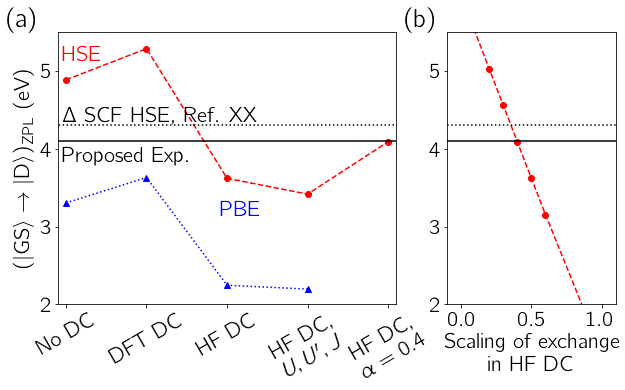

In [42]:
##### JUST TWO VERSIONS, and DFT!!!!!

hse_DCs_2=[uijkl_nodc_hse,hse_uijkl_dc,hse_u_uprime_j_dc,hse_avgP_dc]
hse_DCs_ex_2=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_u_uprime_j_dc_ex,hse_avgP_dc_ex]
DCs_2=[uijkl_nodc,uijkl_dc,u_uprime_j_dc,avgP_dc]
DCs_ex_2=[uijkl_nodc_ex,uijkl_dc_ex,u_uprime_j_dc_ex,avgP_dc_ex]

# Lets check out GGA alpha=0
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_alpha=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/excited/DC_test/'
gga_alpha_ex=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))

fig5,(ax51,ax52)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [2, 1]})
#fig5,ax51=plt.subplots(figsize=(8,5))#,gridspec_kw={'width_ratios': [4, 3]})

# For the DFT DC from Malte:
Ub_HSE=2.7309170135 
Vab_HSE=2.6336641478140854
Ub_HSE_ex=2.764516416894391
Vab_HSE_ex=2.15628535855997

Ub_GGA=1.874630107111301
Vab_GGA=1.583909355929249
Ub_GGA_ex=2.0092577956490048
Vab_GGA_ex=1.64728831162292

del_ZPL_GGA=((Ub_GGA-Vab_GGA)+(Ub_GGA_ex-Vab_GGA_ex))/2.0
del_ZPL_HSE=(Ub_HSE-Vab_HSE)+(Ub_HSE_ex-Vab_HSE_ex)/2.0

print(del_ZPL_GGA,del_ZPL_HSE)

fmts=['b:^','r--o','m--o']

# First plot is HSE:
state_hse_zpl=np.zeros(5)
state_gga_zpl=np.zeros(4)
# No DC
state_hse_zpl[0]=hse_DCs_2[0][2]-(hse_DCs_2[0][2]-hse_DCs_ex_2[0][2])/2
state_gga_zpl[0]=DCs_2[0][2]-(DCs_2[0][2]-DCs_ex_2[0][2])/2
# DFT correction for GGA and HSE
state_gga_zpl[1]=DCs_2[0][2]-(DCs_2[0][2]-DCs_ex_2[0][2])/2+del_ZPL_GGA
state_hse_zpl[1]=hse_DCs_2[0][2]-(hse_DCs_2[0][2]-hse_DCs_ex_2[0][2])/2+del_ZPL_HSE
# HF and scaled for HSE and GGA
state_hse_zpl[2]=hse_DCs_2[1][2]-(hse_DCs_2[1][2]-hse_DCs_ex_2[1][2])/2
state_gga_zpl[2]=DCs_2[1][2]-(DCs_2[1][2]-DCs_ex_2[1][2])/2
# U, U', J
state_hse_zpl[3]=hse_DCs_2[2][2]-(hse_DCs_2[2][2]-hse_DCs_ex_2[2][2])/2
state_gga_zpl[3]=DCs_2[2][2]-(DCs_2[2][2]-DCs_ex_2[2][2])/2
# HF scaled for HSE
state_hse_zpl[4]=hse_alphas[3][2]-(hse_alphas[3][2]-hse_alphas_ex[3][2])/2
#state_gga_zpl[3]=gga_alpha[2]-(gga_alpha[2]-gga_alpha_ex[2])/2

ax51.plot(state_gga_zpl,fmts[0])
ax51.plot(state_hse_zpl,fmts[1])
        
# "Experimental" curves
ax51.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax51.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')
 
# Dep on alpha
for jj in range(2,3):
#    ax61.plot(alpha[:],hse_alphas[:,jj],'o--')
    ax52.plot(alpha[:],hse_alphas[:,jj]-(hse_alphas[:,jj]-hse_alphas_ex[:,jj])/2,'or--')
ax52.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax52.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')


    
# Plot Params
ax51.set_xlim(-0.1,4.1)
ax51.set_xticks([0,1,2,3,4])
ax51.set_ylim(2,5.5)
ax51.set_xticklabels(['No DC','DFT DC','HF DC','HF DC,\n'+'$U,U^\prime,J$','HF DC,\n'+r'$\alpha=0.4$'],rotation=30)
ax51.set_ylabel(r'($\vert {\rm GS} \rangle \rightarrow \vert {\rm D} \rangle)_{\rm ZPL}$ (eV)')

ax52.set_xlim(-0.1,1.1)
ax52.set_xticks([0,0.5,1])
ax52.set_ylim(2,5.5)
ax52.set_xlabel('Scaling of exchange \n in HF DC')

fig5.text(0.35,0.37,'PBE',color='blue')
fig5.text(0.13,0.8,'HSE',color='red')
fig5.text(0.13,0.52,'Proposed Exp.',color='black')
fig5.text(0.13,0.63,r'$\Delta$ SCF HSE, Ref. XX',color='black')

#fig5.subplots_adjust(wspace=0.4)
ax51.set_title('(a)',loc='left',x=-0.15)
ax52.set_title('(b)',loc='left',x=-0.25)


plt.savefig('CBCN_DC_ZPL_ver3.pdf',bbox_inches='tight')
plt.show()

0.32634511760406837 0.40136839485312503


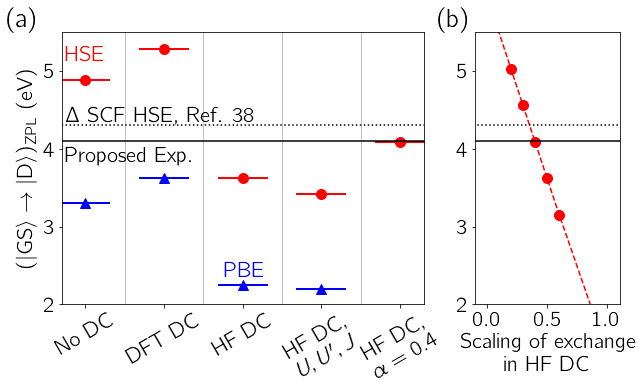

In [53]:
##### JUST TWO VERSIONS, and DFT!!!!!

hse_DCs_2=[uijkl_nodc_hse,hse_uijkl_dc,hse_u_uprime_j_dc,hse_avgP_dc]
hse_DCs_ex_2=[uijkl_nodc_ex_hse,hse_uijkl_dc_ex,hse_u_uprime_j_dc_ex,hse_avgP_dc_ex]
DCs_2=[uijkl_nodc,uijkl_dc,u_uprime_j_dc,avgP_dc]
DCs_ex_2=[uijkl_nodc_ex,uijkl_dc_ex,u_uprime_j_dc_ex,avgP_dc_ex]

# Lets check out GGA alpha=0
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/DC_test/'
gga_alpha=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/excited/DC_test/'
gga_alpha_ex=np.loadtxt(path+'alpha_0_energy_deg.dat',usecols=range(0,1))

fig5,(ax51,ax52)=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [2.5, 1]})
#fig5,ax51=plt.subplots(figsize=(8,5))#,gridspec_kw={'width_ratios': [4, 3]})

# For the DFT DC from Malte:
Ub_HSE=2.7309170135 
Vab_HSE=2.6336641478140854
Ub_HSE_ex=2.764516416894391
Vab_HSE_ex=2.15628535855997

Ub_GGA=1.874630107111301
Vab_GGA=1.583909355929249
Ub_GGA_ex=2.0092577956490048
Vab_GGA_ex=1.64728831162292

del_ZPL_GGA=((Ub_GGA-Vab_GGA)+(Ub_GGA_ex-Vab_GGA_ex))/2.0
del_ZPL_HSE=(Ub_HSE-Vab_HSE)+(Ub_HSE_ex-Vab_HSE_ex)/2.0

print(del_ZPL_GGA,del_ZPL_HSE)

fmts=['b^','ro','mo']
fmts_2=['b_','r_','m_']

# First plot is HSE:
state_hse_zpl=np.zeros(5)
state_gga_zpl=np.zeros(4)
# No DC
state_hse_zpl[0]=hse_DCs_2[0][2]-(hse_DCs_2[0][2]-hse_DCs_ex_2[0][2])/2
state_gga_zpl[0]=DCs_2[0][2]-(DCs_2[0][2]-DCs_ex_2[0][2])/2
# DFT correction for GGA and HSE
state_gga_zpl[1]=DCs_2[0][2]-(DCs_2[0][2]-DCs_ex_2[0][2])/2+del_ZPL_GGA
state_hse_zpl[1]=hse_DCs_2[0][2]-(hse_DCs_2[0][2]-hse_DCs_ex_2[0][2])/2+del_ZPL_HSE
# HF and scaled for HSE and GGA
state_hse_zpl[2]=hse_DCs_2[1][2]-(hse_DCs_2[1][2]-hse_DCs_ex_2[1][2])/2
state_gga_zpl[2]=DCs_2[1][2]-(DCs_2[1][2]-DCs_ex_2[1][2])/2
# U, U', J
state_hse_zpl[3]=hse_DCs_2[2][2]-(hse_DCs_2[2][2]-hse_DCs_ex_2[2][2])/2
state_gga_zpl[3]=DCs_2[2][2]-(DCs_2[2][2]-DCs_ex_2[2][2])/2
# HF scaled for HSE
state_hse_zpl[4]=hse_alphas[3][2]-(hse_alphas[3][2]-hse_alphas_ex[3][2])/2
#state_gga_zpl[3]=gga_alpha[2]-(gga_alpha[2]-gga_alpha_ex[2])/2

ax51.plot(state_gga_zpl,fmts[0],markersize=10)
ax51.plot(state_hse_zpl,fmts[1],markersize=10)

ax51.plot(state_gga_zpl,fmts_2[0],markersize=50,mew=2)
ax51.plot(state_hse_zpl,fmts_2[1],markersize=50,mew=2)
        
# "Experimental" curves
ax51.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax51.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')
 
# Dep on alpha
for jj in range(2,3):
#    ax61.plot(alpha[:],hse_alphas[:,jj],'o--')
    ax52.plot(alpha[:],hse_alphas[:,jj]-(hse_alphas[:,jj]-hse_alphas_ex[:,jj])/2,'or--',markersize=10)
ax52.plot(range(-1,7),[4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1],'k-')
ax52.plot(range(-1,7),[4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31],'k:')


    
# Plot Params
ax51.set_xlim(-0.3,4.3)
ax51.set_xticks([0,1,2,3,4])
ax51.set_ylim(2,5.5)
ax51.set_xticklabels(['No DC','DFT DC','HF DC','HF DC,\n'+'$U,U^\prime,J$','HF DC,\n'+r'$\alpha=0.4$'],rotation=30)
ax51.set_ylabel(r'($\vert {\rm GS} \rangle \rightarrow \vert {\rm D} \rangle)_{\rm ZPL}$ (eV)')

# Gridlines
ax51.xaxis.set_minor_locator(MultipleLocator(0.5))
ax51.grid(axis='x',which='minor')
ax51.tick_params(which='minor', length=0)


ax52.set_xlim(-0.1,1.1)
ax52.set_xticks([0,0.5,1])
ax52.set_ylim(2,5.5)
ax52.set_xlabel('Scaling of exchange \n in HF DC')

fig5.text(0.35,0.2,'PBE',color='blue')
fig5.text(0.13,0.8,'HSE',color='red')
fig5.text(0.13,0.52,'Proposed Exp.',color='black')
fig5.text(0.13,0.63,r'$\Delta$ SCF HSE, Ref. 38',color='black')

#fig5.subplots_adjust(wspace=0.4)
ax51.set_title('(a)',loc='left',x=-0.15)
ax52.set_title('(b)',loc='left',x=-0.25)


plt.savefig('CBCN_DC_ZPL_ver3.pdf',bbox_inches='tight')
plt.show()

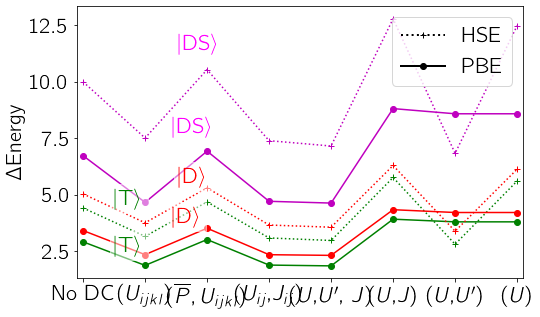

In [44]:
fig5,ax51=plt.subplots(figsize=(8,5))#,gridspec_kw={'width_ratios': [2.5, 1]})

fmts=['g','r','m']
#fmts=['b:^','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(8)
    state_hse=np.zeros(8)
    sing_zpl=np.zeros(8)
    sing_zpl_GGA=np.zeros(8)
    for jj in range(0,8):
        state[jj]=DCs[jj][ii]
        state_hse[jj]=hse_DCs[jj][ii]
        sing_zpl[jj]=hse_DCs[jj][ii]-(hse_DCs[jj][ii]-hse_DCs_ex[jj][ii])/2
        sing_zpl_GGA[jj]=DCs[jj][ii]-(DCs[jj][ii]-DCs_ex[jj][ii])/2
        
    ax51.plot(state,fmts[ii-1]+'-o')
    ax51.plot(state_hse,fmts[ii-1]+':+')
    
# Plot Params
ax51.set_xticks([0,1,2,3,4,5,6,7])
ax51.set_xlim(-0.1,7.1)
ax51.set_xticklabels(['No DC','($U_{ijkl}$)','($\overline{P},U_{ijkl}$)','($U_{ij}$,$J_{ij})$','($U$,$U^\prime$, $J$)','($U$,$J$)','($U$,$U^\prime$)','($U$)'])
ax51.set_ylabel(r'$\Delta$Energy')
#ax51.set_ylim(2.5,7)

fig5.text(0.19,0.33,r'$\vert {\rm T} \rangle$',color='green',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.19,0.2,r'$\vert {\rm T} \rangle$',color='green',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig5.text(0.3,0.39,r'$\vert {\rm D} \rangle$',color='red',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.29,0.28,r'$\vert {\rm D} \rangle$',color='red',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig5.text(0.3,0.76,r'$\vert {\rm DS} \rangle$',color='magenta',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.29,0.53,r'$\vert {\rm DS} \rangle$',color='magenta',bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

leg_el = [Line2D([0], [0], color='k',ls=':',lw=2,marker='+'), \
          Line2D([0], [0], color='k',ls='-',lw=2,marker='o')]
ax51.legend(leg_el,['HSE','PBE'],loc='upper right')#,bbox_to_anchor=(0.0,0.5))

plt.savefig('CBCN_DC_HSE_PBE.pdf',bbox_inches='tight')
plt.show()



1.0420000000000003
1.2534780000999999
1.065
1.2756622954999997
2.0629999999999997
2.4851942220999996


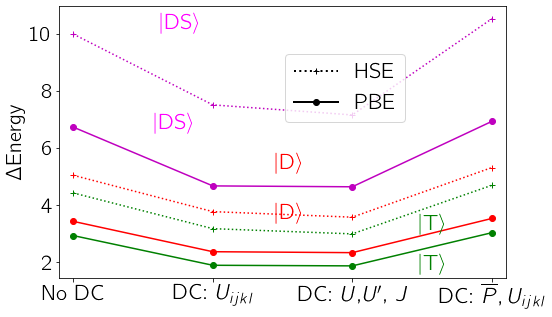

In [45]:
# SAME AS ABOVE BUT ONLY TWO

fig5,ax51=plt.subplots(figsize=(8,5))#,gridspec_kw={'width_ratios': [2.5, 1]})

fmts=['g','r','m']
#fmts=['b:^','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(4)
    state_hse=np.zeros(4)
    sing_zpl=np.zeros(4)
    sing_zpl_GGA=np.zeros(4)
    for jj in range(0,4):
        state[jj]=DCs_2[jj][ii]
        state_hse[jj]=hse_DCs_2[jj][ii]
        sing_zpl[jj]=hse_DCs_2[jj][ii]-(hse_DCs_2[jj][ii]-hse_DCs_ex_2[jj][ii])/2
        sing_zpl_GGA[jj]=DCs_2[jj][ii]-(DCs_2[jj][ii]-DCs_ex_2[jj][ii])/2
        
    ax51.plot(state,fmts[ii-1]+'-o')
    ax51.plot(state_hse,fmts[ii-1]+':+')
    
    # TEST
    print(state[0]-state[1])
    print(state_hse[0]-state_hse[1])
    
# Plot Params
ax51.set_xticks([0,1,2,3])
ax51.set_xlim(-0.1,3.1)
ax51.set_xticklabels(['No DC','DC: $U_{ijkl}$','DC: $U$,$U^\prime$, $J$','DC: $\overline{P},U_{ijkl}$'])
ax51.set_ylabel(r'$\Delta$Energy')
#ax51.set_ylim(2.5,7)

fig5.text(0.75,0.26,r'$\vert {\rm T} \rangle$',color='green')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.75,0.15,r'$\vert {\rm T} \rangle$',color='green')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig5.text(0.5,0.43,r'$\vert {\rm D} \rangle$',color='red')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.5,0.29,r'$\vert {\rm D} \rangle$',color='red')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

fig5.text(0.3,0.82,r'$\vert {\rm DS} \rangle$',color='magenta')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))
fig5.text(0.29,0.54,r'$\vert {\rm DS} \rangle$',color='magenta')#,bbox=dict(edgecolor='white',facecolor='white', alpha=0.5))

leg_el = [Line2D([0], [0], color='k',ls=':',lw=2,marker='+'), \
          Line2D([0], [0], color='k',ls='-',lw=2,marker='o')]
ax51.legend(leg_el,['HSE','PBE'],loc='center right',bbox_to_anchor=(0.8,0.7))

plt.savefig('CBCN_DC_HSE_PBE_Ver2.pdf',bbox_inches='tight')
plt.show()


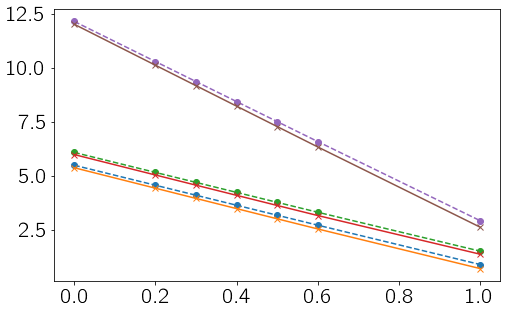

In [46]:
fig6,ax61=plt.subplots(figsize=(8,5))

for jj in range(1,4):
    ax61.plot(alpha[:],hse_alphas[:,jj],'o--')
    ax61.plot(alpha[:],hse_alphas[:,jj]-(hse_alphas[:,jj]-hse_alphas_ex[:,jj])/2,'x-')

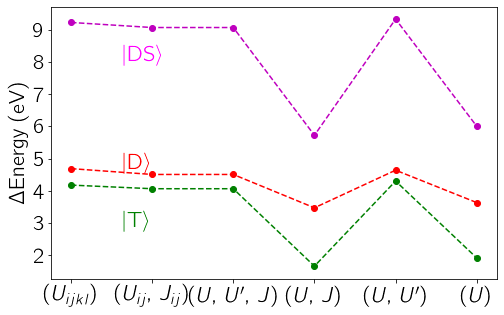

In [47]:
# GGA, consistent simp of DC and U
path='/Users/cdreyer/Dropbox/CCQ_SB_Research/NV/BN/Cdiamer_tests/bulk/4x4x2_kmesh/GGA/ground/const_U_DC/'
opt_uijkl_dc=np.loadtxt(path+'0_opt_energy_deg.dat',usecols=range(0,1))
opt_u_uprime_j_dc=np.loadtxt(path+'1_opt_energy_deg.dat',usecols=range(0,1))
opt_uij_jij_dc=np.loadtxt(path+'2_opt_energy_deg.dat',usecols=range(0,1))
opt_u_only_dc=np.loadtxt(path+'3_opt_energy_deg.dat',usecols=range(0,1))
opt_u_u_prime_dc=np.loadtxt(path+'4_opt_energy_deg.dat',usecols=range(0,1))
opt_u_j_dc=np.loadtxt(path+'5_opt_energy_deg.dat',usecols=range(0,1))

opt_DCs=[opt_uijkl_dc,opt_uij_jij_dc,opt_u_uprime_j_dc,opt_u_j_dc,opt_u_u_prime_dc,opt_u_only_dc]

fig7,ax71=plt.subplots(figsize=(8,5))

fmts=['g--o','r--o','m--o']

for ii in range(1,4):
    state=np.zeros(6)
    for jj in range(0,6):
        state[jj]=opt_DCs[jj][ii]

    ax71.plot(state,fmts[ii-1])
        
    
# Plot Params
ax71.set_xticks([0,1,2,3,4,5])
ax71.set_xticklabels(['($U_{ijkl}$)','($U_{ij}$, $J_{ij})$','($U$, $U^\prime$, $J$)','($U$, $J$)','($U$, $U^\prime$)','($U$)'])
ax71.set_ylabel('$\Delta$Energy (eV)')
ax71.set_yticks([2,3,4,5,6,7,8,9])

fig7.text(0.25,0.27,r'$\vert {\rm T} \rangle$',color='green')
fig7.text(0.25,0.43,r'$\vert {\rm D} \rangle$',color='red')
fig7.text(0.25,0.73,r'$\vert {\rm DS} \rangle$',color='magenta')

#plt.savefig('CBCN_DC.pdf',bbox_inches='tight')
plt.show()

In [48]:
#g=2 * ( P^{(1,x)}_{(z,1x)} - P^{(1,z)}_{(x,1x)} ) / (d*m_N)
2*(-0.14320606E+01-(0.11790692E+01))/(2.66816*19)

-0.10301322575147391